In [150]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.rcParams['font.family'] = 'NanumGothic'

pytrends = TrendReq()

In [151]:
pytrends = TrendReq(tz= 360)
kws = ['코로나', '우크라이나', '러시아', '러시아 우크라이나', '월드컵']

pytrends.build_payload(kws,
                       geo = 'KR',
                      timeframe = '2022-01-01 2022-12-31')

In [152]:
df = pytrends.interest_over_time().drop('isPartial', axis = 1)
df = df * 100 / df.max()

In [153]:
df = df.reset_index()
df_long = df.melt(id_vars = ["date"],
                 var_name = "Keyword",
                 value_name = "Interest")

C:\Users\dowra\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dowra\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, '구글 서치 결과 : 2022')

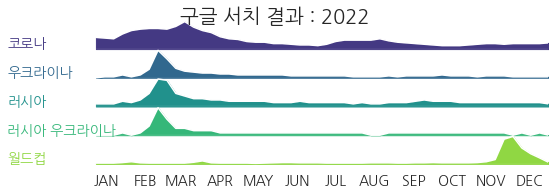

In [155]:
# 병렬로 나열 https://seaborn.pydata.org/examples/kde_ridgeplot.html

g = sns.FacetGrid(df_long, 
                  row = 'Keyword', 
                  hue = 'Keyword', # 색깔 다르게 주려고 넣음
                  aspect = 15,
                  height = 0.55,
                  palette = "viridis"
                 )

indent = 70

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 
           .2, 
           label,
           fontsize = 14,
           fontweight = "bold",
           color = color,
            # 왼쪽 가운데에 축처럼 텍스트가 박힘
           ha = "left",
           va = "center",
           transform = ax.transAxes)

g.map(label, "date")


g.map(plt.plot, "date", "Interest", color = 'white')
g.map(plt.fill_between, "date", "Interest", alpha = 1)


g.refline(y = 0 , color = "white",
          linestyle = '-',
          linewidth = .1,
          clip_on = False) # reference line

g.figure.subplots_adjust(hspace = -.05)
g.set_titles("")
g.despine(bottom = True, left = True)
g.set(
    yticks = [],
    ylabel = "",
    xlabel = "",
    xlim = [df_long.date.min() - datetime.timedelta(indent), df_long.date.max()],
    xticks = [datetime.datetime(df_long.date.min().year, i, 10) for i in range(1, 13)],
    xticklabels = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG",
                  "SEP", "OCT", "NOV", "DEC"]
)

plt.suptitle(f"구글 서치 결과 : {df_long.date.min().year}", fontsize = 20)